In [1]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import srkgraphics
import srkanalysis
import srktext
import itertools
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 14
rcParams['xtick.labelsize'] = 20
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Arial')
graphs_dir='/home/mjbales/work/nedm/graphs/'

b_gradient_str = [1.e-10, 1.e-9, 1.e-8]
Omega_range=srkmisc.even_sample_over_log(.1, 10, 100)
legend_titles_b_gradients=[str(x)+' T/m B Gradient' for x in b_gradient_str]
omega_0=(4.84578839927e7*1e-6)
Omega_scale_factor= 0.235*(4.84578839927e7*1e-6)
eta=0.235*omega_0*10e6/(1e-6*299792458*299792458)

import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT,TLegend
import rootnotes
# import rootprint
gStyle.SetOptFit()
gStyle.SetOptStat(0)
gStyle.SetOptTitle(0)
gStyle.SetPadTickX(1)
gStyle.SetPadTickY(1)
gStyle.SetGridColor(12)
gROOT.ForceStyle();
c1=rootnotes.canvas("Canvas", (800, 600))
# c1.SetRightMargin(0.3)
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)

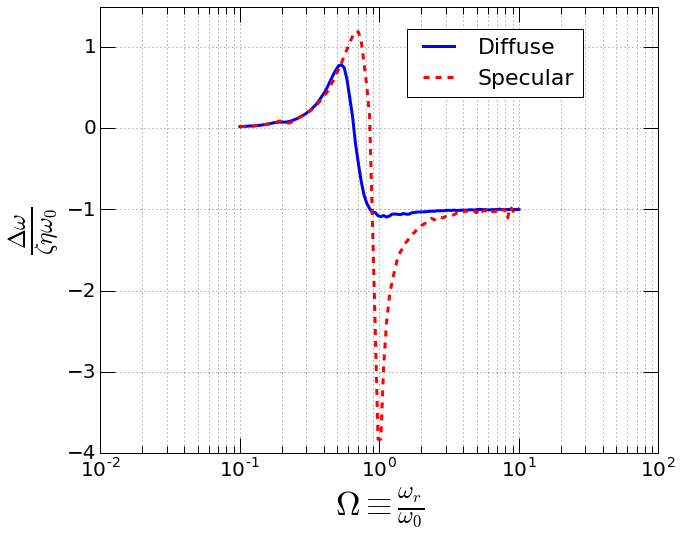

In [8]:
lines = [range(917, 1017),range(1217, 1317)]
legend_tiles = ["Diffuse","Specular"]
color=['blue','red']
linestyles=['-','--']

rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 18
fig=plt.figure(1)

x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
for i in range(len(lines)):
    zeta=1e-8*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='',label = legend_tiles[i],c=color[i],linestyle=linestyles[i],linewidth=3)

plt.tick_params(labelsize=20)
plt.xlabel(r'$\Omega\equiv\frac{\omega_r}{\omega_0}$', fontsize=34)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=34)
# plt.title('2D Simulation, Linear Magnetic Gradient', fontsize=22)
plt.grid(True,which="both")
plt.tick_params('both', length=15, width=1, which='major')
plt.tick_params('both', length=7, width=1, which='minor')
plt.axis([ 0.01, 100,-4, 1.5])
plt.legend(bbox_to_anchor=(0.55, .95), loc=2, borderaxespad=0., fontsize=22)
# plt.figtext(0, .85, r'(a)', fontsize=30)


plt.savefig("/home/mjbales/work/nedm/graphs/Validation_Steyerl.eps", bbox_inches='tight', dpi=200)
plt.show()


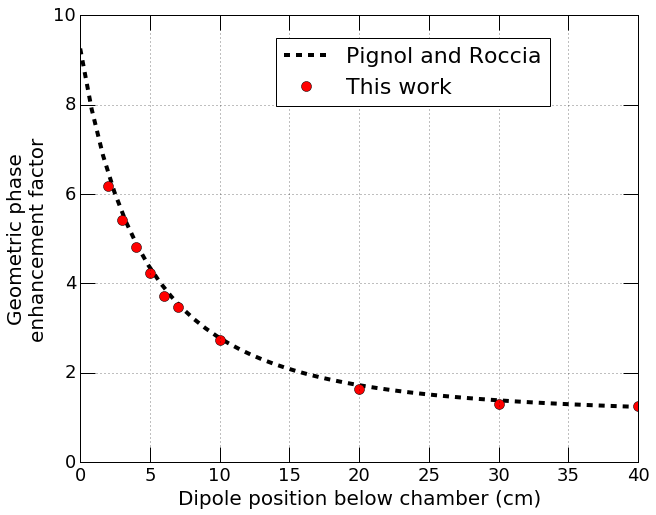

In [10]:
lines = [range(917, 1017),range(1217, 1317)]
legend_tiles = ["Diffuse","Specular"]
color=['blue','red']
linestyles=['-','--']

rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 18


rcParams['xtick.labelsize'] = 18
fig=plt.figure(1)
x=np.linspace(0., 40, num = 50)
y=[]
for dist in x:
    y+=[srkanalysis.calc_e_plus_one(1, 0.24, 0.12, dist/100)]
plt.plot(x,y,linestyle='--', c='black',linewidth=4,label = "Pignol and Roccia")
lines = [range(4822,4828)+range(5460,5464),range(4833,4839)+range(5464,5468),range(4844,4850)+range(5468,5472),range(4855,4861)+range(5472,5476),range(4866,4872)+range(5476,5480)]
data = srkdata.get_plot_data_from_database_mult(lines, ["DipolePositionBelowChamber","FalseEDM","FalseEDMError","PRPrediction","PREPlusOne"])
fixed_data=[]
for line in [data[0]]:
    fixed_line=[]
    for point in zip(*line):
        fixed_line.append([-point[0]*100,-point[4]*point[1]/point[3],point[4]*point[2]/point[3]])
    fixed_line=zip(*fixed_line)
    fixed_data.append(fixed_line)
    plt.plot(fixed_line[0],fixed_line[1],'o',marker='o',c='red',label = "This work",ms=10)

plt.xlabel(r'Dipole position below chamber (cm)', fontsize=20)
plt.ylabel('Geometric phase\nenhancement factor', fontsize=20)
titles=["","","E+1"]
# srkgraphics.make_plot_from_data(fixed_data, titles)
# plt.xscale('log', noncvposy='clip')
plt.grid(True)
plt.axis([ 0.0, 40,0, 10])
plt.tick_params('both', length=15, width=1, which='major')
plt.tick_params('both', length=7, width=1, which='minor')
plt.legend(bbox_to_anchor=(0.35, .95), loc=2, borderaxespad=0., fontsize=22,numpoints=1)
plt.savefig("/home/mjbales/work/nedm/graphs/Validation_Pignol.eps", bbox_inches='tight', dpi=200)
plt.show()
